##### 1. Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 2.Loading the Dataset

In [34]:
df = pd.read_csv("flood.csv")

##### 3. Understanding the Dataset

In [35]:
df.columns

Index(['segment_id', 'city_name', 'admin_ward', 'latitude', 'longitude',
       'catchment_id', 'elevation_m', 'dem_source', 'land_use', 'soil_group',
       'drainage_density_km_per_km2', 'storm_drain_proximity_m',
       'storm_drain_type', 'rainfall_source',
       'historical_rainfall_intensity_mm_hr', 'return_period_years',
       'risk_labels'],
      dtype='object')

In [36]:
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [37]:
df.shape

(2963, 17)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2802 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2601 non-null   object 
 10  drainage_density_km_per_km2          2679 non-null   float64
 11  storm_drain_proximity_m       

##### 4. Data Cleaning

In [39]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2958    False
2959    False
2960    False
2961    False
2962    False
Length: 2963, dtype: bool

In [40]:
df.duplicated().any()

False

In [41]:
df.isnull().sum()

segment_id                               0
city_name                                0
admin_ward                               0
latitude                                 0
longitude                                0
catchment_id                             0
elevation_m                            161
dem_source                               0
land_use                                 0
soil_group                             362
drainage_density_km_per_km2            284
storm_drain_proximity_m                239
storm_drain_type                       178
rainfall_source                        315
historical_rainfall_intensity_mm_hr      0
return_period_years                      0
risk_labels                              0
dtype: int64

In [ ]:
ele_med= df['elevation_m'].median()
ele_med
df['elevation_m'] =  df['elevation_m'].fillna(ele_med)

0       25.13
1       -2.19
2       30.88
3       24.28
4       35.70
        ...  
2958    30.46
2959    -3.00
2960    14.16
2961     7.00
2962    56.00
Name: elevation_m, Length: 2963, dtype: float64

In [43]:
df['soil_group'] = df['soil_group'].fillna("Unknown")
df['soil_group']

0       Unknown
1             D
2             B
3             B
4             C
         ...   
2958          C
2959          C
2960          B
2961          B
2962          C
Name: soil_group, Length: 2963, dtype: object

In [44]:
df.isnull().sum()

segment_id                               0
city_name                                0
admin_ward                               0
latitude                                 0
longitude                                0
catchment_id                             0
elevation_m                              0
dem_source                               0
land_use                                 0
soil_group                               0
drainage_density_km_per_km2            284
storm_drain_proximity_m                239
storm_drain_type                       178
rainfall_source                        315
historical_rainfall_intensity_mm_hr      0
return_period_years                      0
risk_labels                              0
dtype: int64

In [47]:
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,Unknown,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [52]:
drain_mean = df['drainage_density_km_per_km2'].mean()
df['drainage_density_km_per_km2'] = df['drainage_density_km_per_km2'].fillna(drain_mean)

In [57]:
storm_med = df['storm_drain_proximity_m'].median()
df['storm_drain_proximity_m'] = df['storm_drain_proximity_m'].fillna(storm_med)

In [61]:
df['storm_drain_type'] = df['storm_drain_type'].fillna("Unknown")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2963 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2963 non-null   object 
 10  drainage_density_km_per_km2          2963 non-null   float64
 11  storm_drain_proximity_m       

In [66]:
df['rainfall_source'] = df['rainfall_source'].fillna("Unknown")

In [71]:
df.head(3)

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,Unknown,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,91.7,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2963 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2963 non-null   object 
 10  drainage_density_km_per_km2          2963 non-null   float64
 11  storm_drain_proximity_m       

##### 5. Data Transformation

In [72]:
df['risk_labels'].value_counts()

risk_labels
monitor                                            1991
low_lying                                           386
extreme_rain_history                                137
sparse_drainage                                      88
ponding_hotspot|low_lying                            78
                                                   ... 
ponding_hotspot|low_lying|event_2023-06-21            1
ponding_hotspot|low_lying|event_2022-06-14            1
extreme_rain_history|low_lying|event_2025-04-14       1
low_lying|event_2022-06-11                            1
extreme_rain_history|low_lying|event_2023-11-07       1
Name: count, Length: 195, dtype: int64

##### 6. EDA

# 1.
How many total records are there in the dataset?

What are the different risk_labels?

How many segments fall under each risk label?

In [74]:
a = df.shape[0]
print(f'There are {a} Records in the Dataset')

There are 2963 Records in the Dataset


In [78]:
df['risk_labels'].unique()

array(['monitor', 'ponding_hotspot|low_lying|event_2025-05-02',
       'extreme_rain_history', 'low_lying|event_2024-02-14', 'low_lying',
       'ponding_hotspot|extreme_rain_history|low_lying|event_2024-09-25',
       'monitor|event_2022-09-04',
       'ponding_hotspot|low_lying|event_2024-07-31',
       'ponding_hotspot|extreme_rain_history|event_2022-10-11',
       'low_lying|sparse_drainage',
       'ponding_hotspot|low_lying|event_2024-07-21',
       'ponding_hotspot|extreme_rain_history|low_lying|event_2023-05-16',
       'sparse_drainage', 'sparse_drainage|event_2024-05-19',
       'ponding_hotspot|extreme_rain_history|low_lying|event_2023-09-13',
       'low_lying|sparse_drainage|event_2023-07-20',
       'extreme_rain_history|low_lying', 'ponding_hotspot|low_lying',
       'ponding_hotspot|low_lying|event_2024-08-16',
       'ponding_hotspot|low_lying|event_2024-03-31',
       'low_lying|event_2024-03-24',
       'ponding_hotspot|low_lying|event_2022-12-18',
       'low_lying|

# 2.
Do low elevation areas have more flood risk than high elevation areas?

Which soil type (A–D) is most common in risky areas?

Which land use type (Residential, Industrial, Institutional) shows the highest flood risk?

In [80]:
df['soil_group'].value_counts()

soil_group
B          747
C          713
D          594
A          547
Unknown    362
Name: count, dtype: int64

In [81]:
df['land_use'].value_counts()

land_use
Residential      827
Roads            599
Commercial       493
Green            359
Industrial       357
Mixed            110
Institutional    106
Water             83
Informal          29
Name: count, dtype: int64

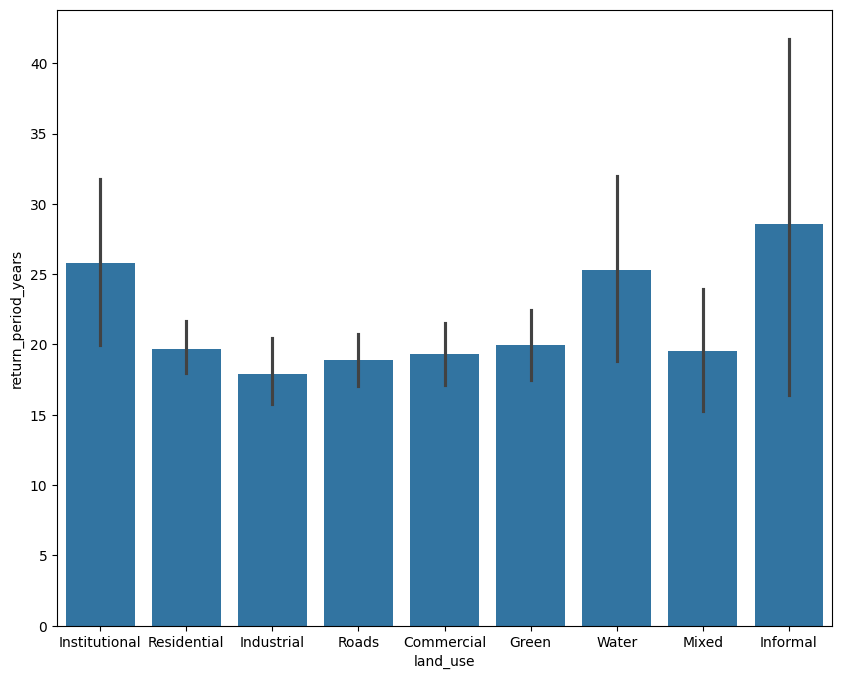

In [104]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='land_use',y='return_period_years')
plt.show()

# 3. 

Are places closer to drains safer compared to those far away?

Which drain type (Open Channel, Manhole, Curb Inlet) is seen more in risky areas?


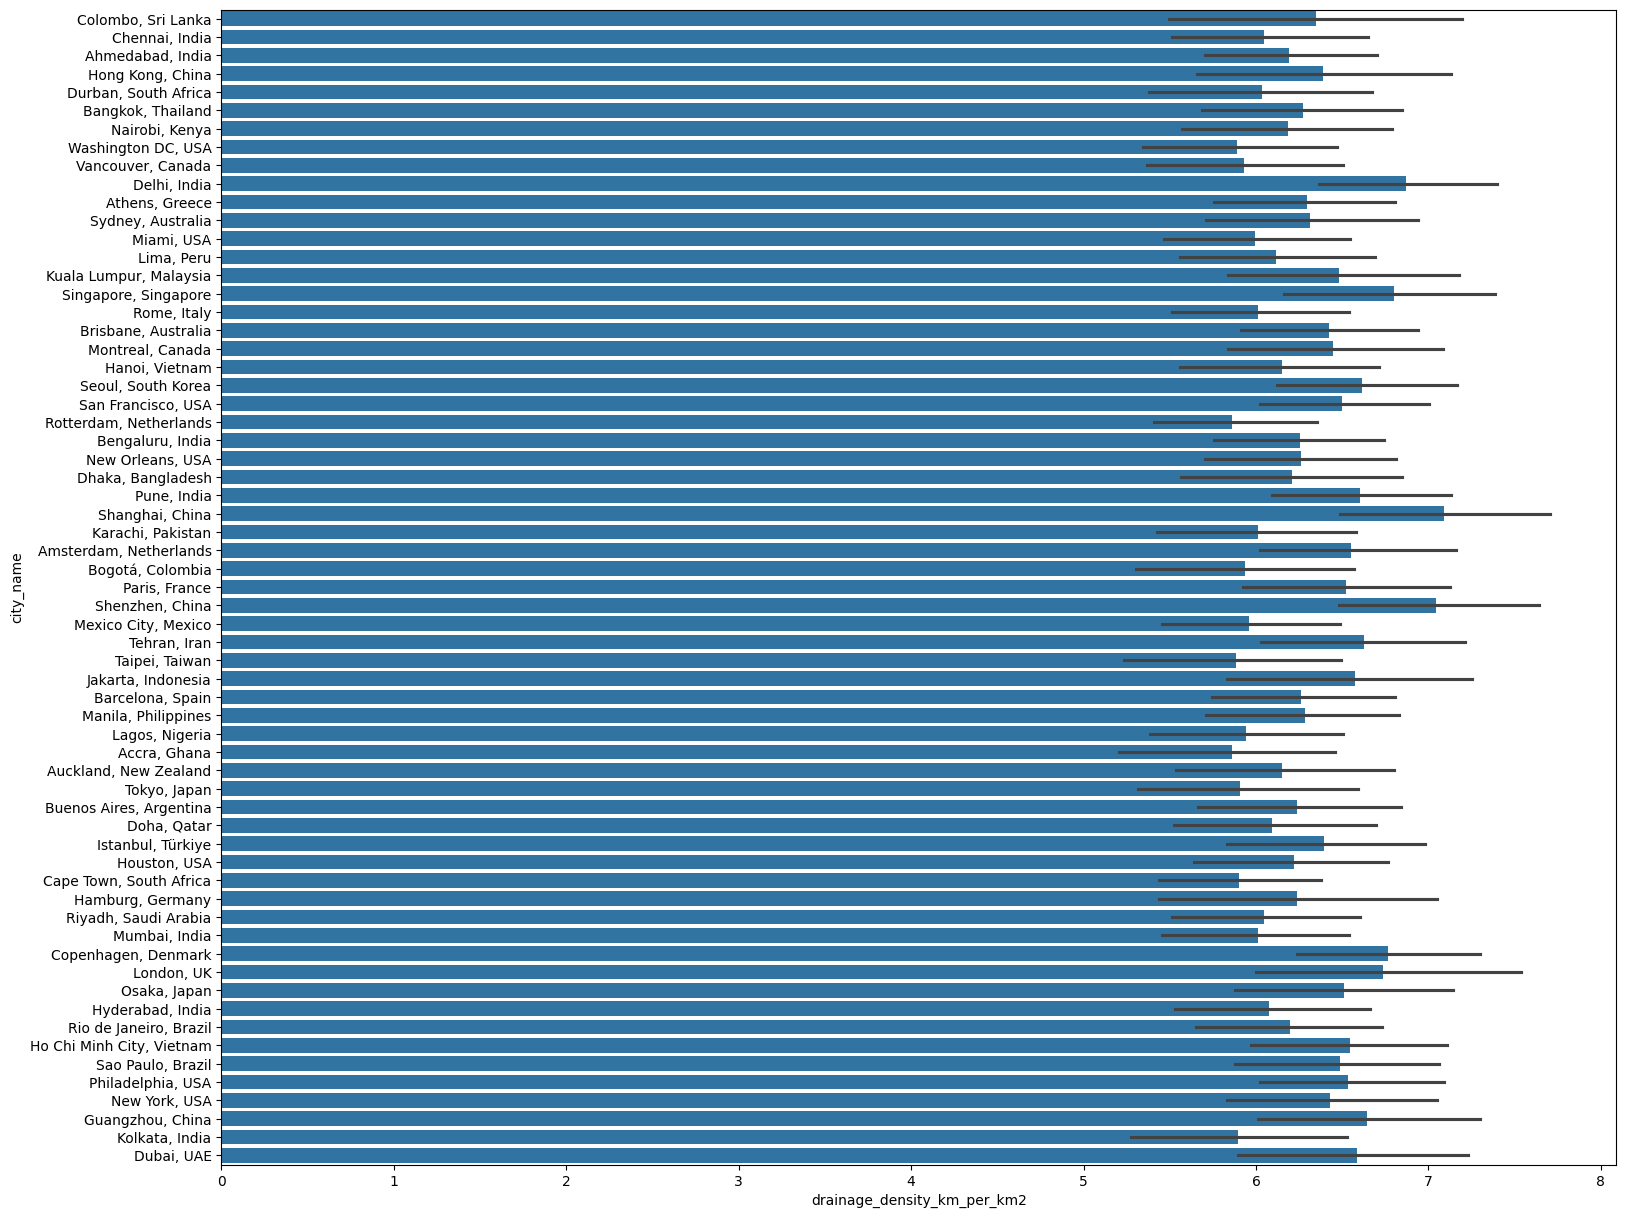

In [108]:
plt.figure(figsize=(18,15))
sns.barplot(data=df,x='drainage_density_km_per_km2',y='city_name')
plt.show()

In [83]:
df['storm_drain_type'].value_counts()

storm_drain_type
CurbInlet      843
Manhole        749
GratedInlet    644
OpenChannel    549
Unknown        178
Name: count, dtype: int64

# 4. 
Do areas with higher rainfall intensity face more flooding?

Does flood risk increase with longer return periods (5 vs 25 vs 50 years)?

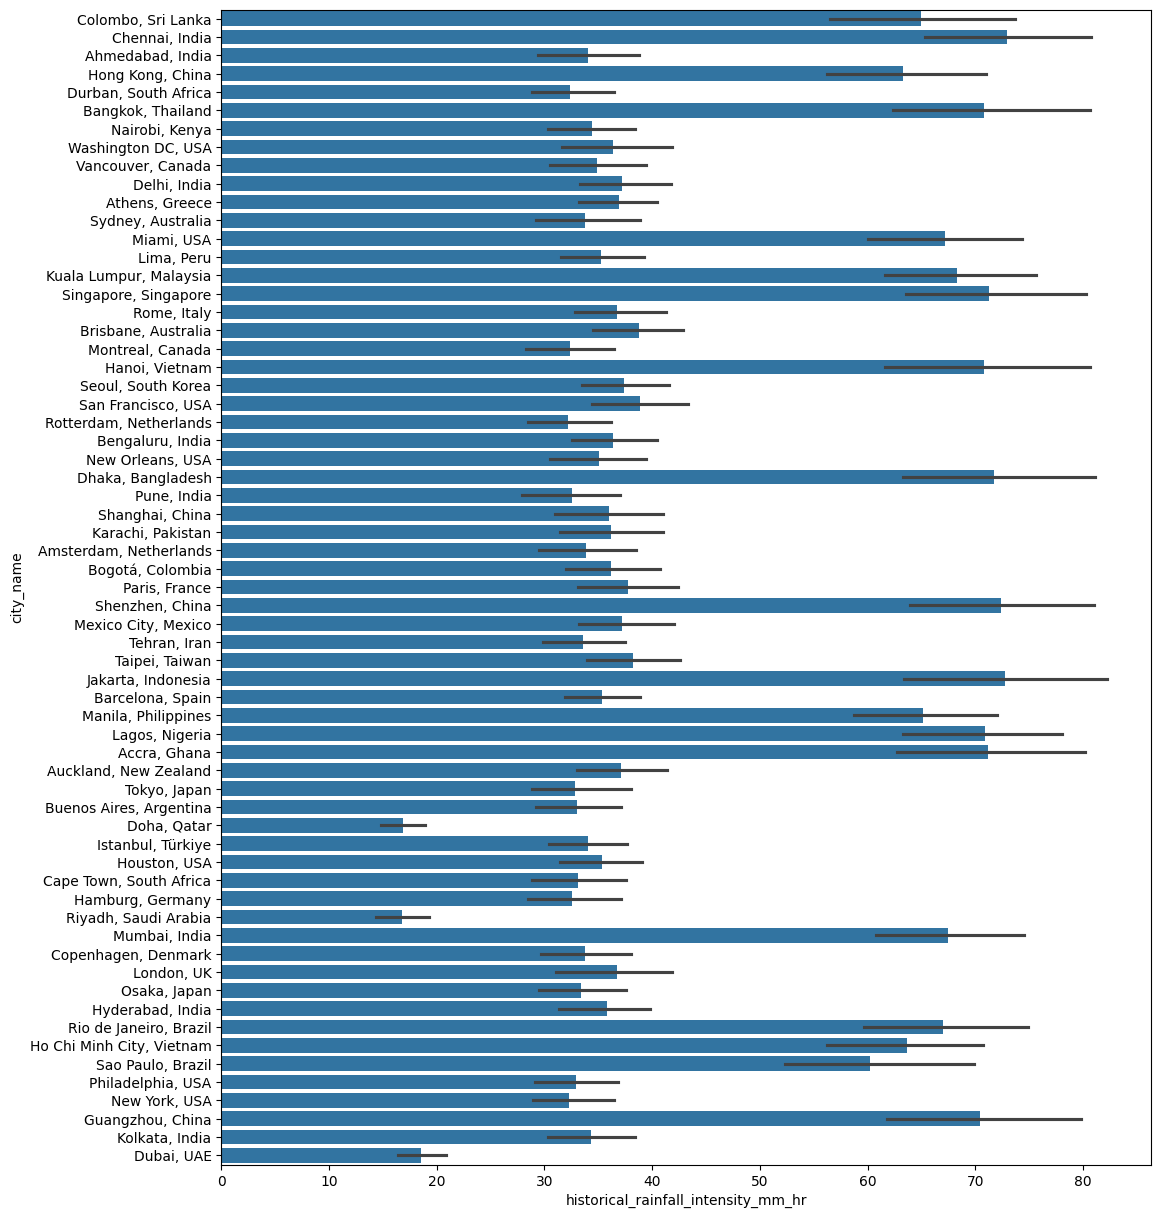

In [114]:
plt.figure(figsize=(12,15))
sns.barplot(data=df,x='historical_rainfall_intensity_mm_hr',y='city_name')
plt.show()

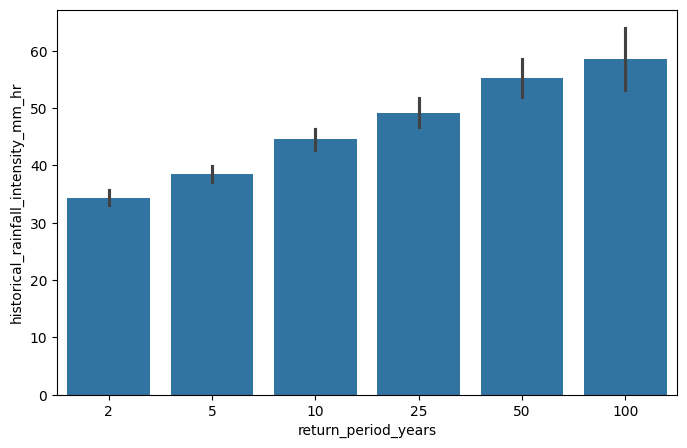

In [112]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='return_period_years',y='historical_rainfall_intensity_mm_hr')
plt.show()

In [109]:
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,Unknown,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,91.7,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [87]:
df['return_period_years'].value_counts()

return_period_years
5      710
2      625
10     616
25     472
50     366
100    174
Name: count, dtype: int64

# 5. 
Which city has the highest number of flood hotspots?

Within a city, which wards are most affected?

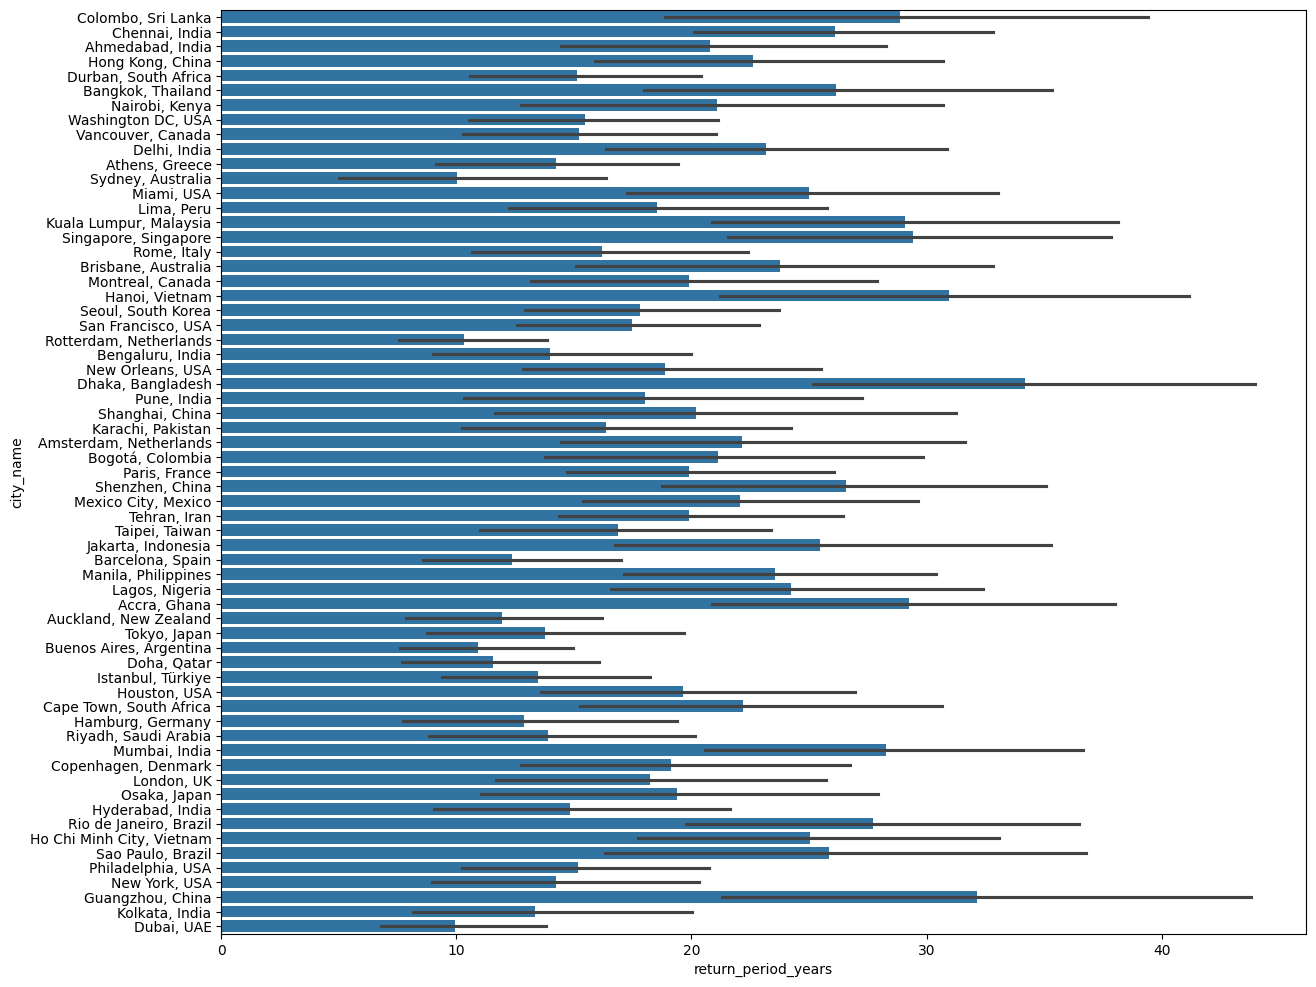

In [115]:
plt.figure(figsize=(14,12))
sns.barplot(data=df,x='return_period_years',y='city_name')
plt.show()


# 6.
Which 2–3 factors combined (e.g., low elevation + residential + high rainfall) appear most often in risky areas?

What patterns or trends can be seen in the dataset overall?


# 7.
Which areas (or regions) are at highest risk of flooding?

Which locations must be prioritized for flood prevention measures?

Which areas are safest for new houses or infrastructure?

Which villages/towns need early flood warning systems immediately?

Should resources (funds, manpower) be focused on high rainfall zones, clay soil regions, or urbanized areas?

What is the top recommendation for reducing flood risk in this region?